<a href="https://colab.research.google.com/github/AbduzZami/ColabNotebooks/blob/main/GAU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [555]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/20250821_130104.jpg')

Resized Image:


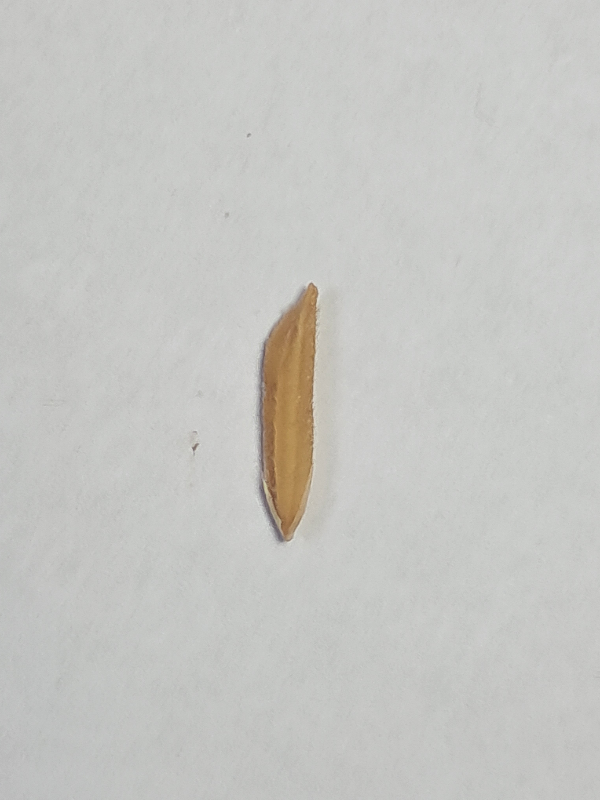

In [556]:
# Define the desired width (adjust as needed)
desired_width = 600

# Calculate the aspect ratio and new height
aspect_ratio = img.shape[1] / img.shape[0]
desired_height = int(desired_width / aspect_ratio)

# Resize the image
img = cv2.resize(img, (desired_width, desired_height))

# Display the resized image
print("Resized Image:")
cv2_imshow(img)

Image with Only White Color Range Kept:


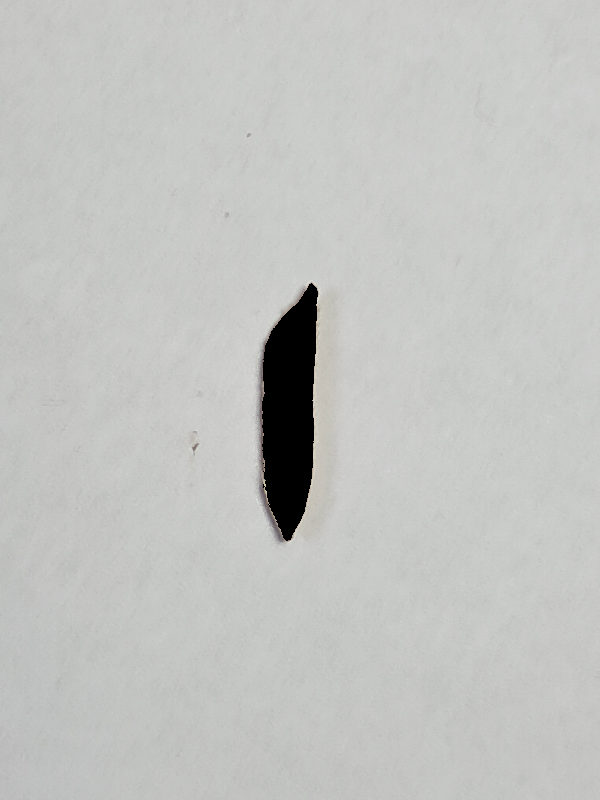

In [557]:
# Convert the image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the range for white color in HSV (adjust these values as needed)
# White is represented by high V (Value/Brightness)
lower_white = np.array([0, 0, 0])
upper_white = np.array([255, 50, 255]) # A wider range for saturation to include off-white

# Create a mask to isolate the white color
mask = cv2.inRange(hsv, lower_white, upper_white)

# Apply the mask to the original image to keep only the white areas
result_white = cv2.bitwise_and(img, img, mask=mask)

# Display the image with only the white areas
print("Image with Only White Color Range Kept:")
cv2_imshow(result_white)

Binary Image of result_white:


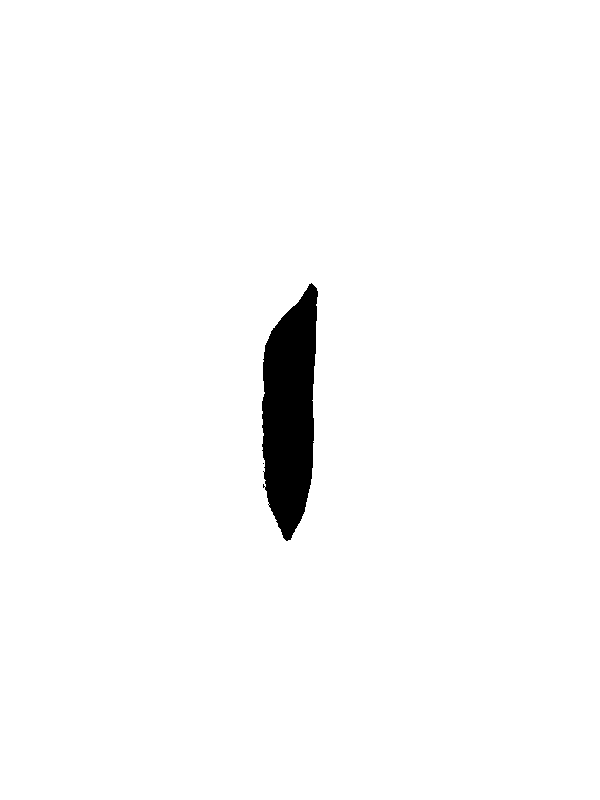

In [558]:
# Convert non-zero pixels in result_white to 255
ret, binary_result_white = cv2.threshold(result_white, 0, 255, cv2.THRESH_BINARY)

# Display the binary image
print("Binary Image of result_white:")
cv2_imshow(binary_result_white)

Inverted Binary Image:


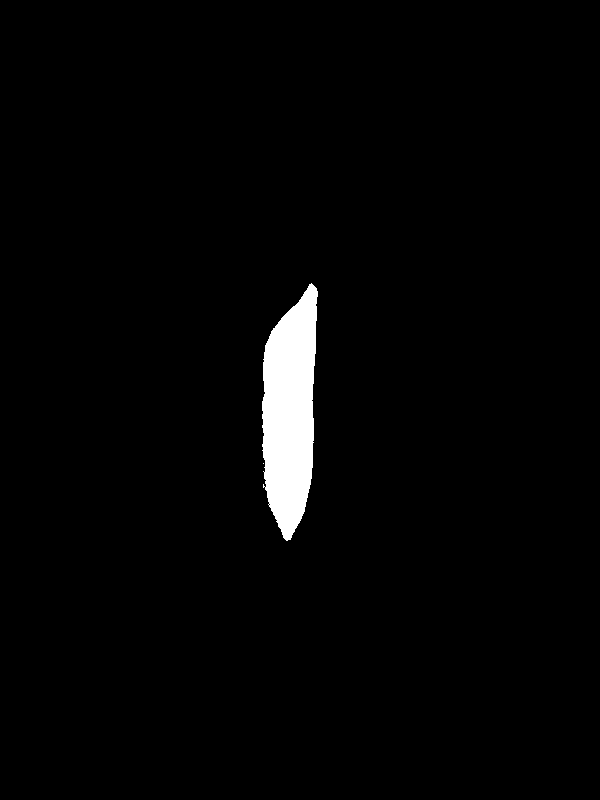

In [559]:
# Invert the binary image
inverted_binary_result_white = cv2.bitwise_not(binary_result_white)

# Display the inverted binary image
print("Inverted Binary Image:")
cv2_imshow(inverted_binary_result_white)

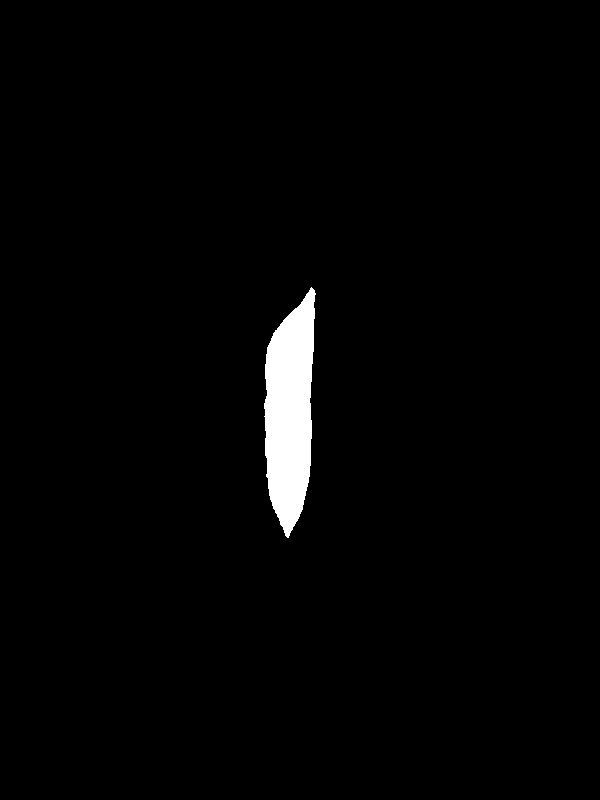

In [560]:
# Ensure your image is binary
inverted_binary_result_white = np.where(inverted_binary_result_white > 0, 255, 0).astype(np.uint8)

# Define a kernel (3x3 or 5x5 depending on dot size)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Apply erosion
inverted_binary_result_white = cv2.erode(inverted_binary_result_white, kernel, iterations=1)

cv2_imshow(inverted_binary_result_white)

Cropped Image:


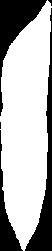

In [561]:
# Convert result_white to grayscale
inverted_binary_result_white = cv2.cvtColor(inverted_binary_result_white, cv2.COLOR_BGR2GRAY)

# Find the coordinates of all non-zero pixels in the inverted binary image
coords = cv2.findNonZero(inverted_binary_result_white)

# Get the bounding box
x, y, w, h = cv2.boundingRect(coords)

# Crop the image using the bounding box
cropped_image = inverted_binary_result_white[y:y+h, x:x+w]

# Display the cropped image
print("Cropped Image:")
cv2_imshow(cropped_image)

In [562]:
# # Convert result_white to grayscale
# gray_result_white = cv2.cvtColor(inverted_binary_result_white, cv2.COLOR_BGR2GRAY)

# # Create a mask where non-black pixels are white (255) and black pixels are black (0)
# # Adjust the threshold value (e.g., 10) if there are near-black colors you want to consider black
# ret, non_black_mask = cv2.threshold(gray_result_white, 180, 255, cv2.THRESH_BINARY)

# # Create a white image of the same size as the original
# white_img = np.full_like(img, 255, dtype=np.uint8)

# # Use the non_black_mask to copy white pixels from the white_img to the areas where result_white was not black
# result_non_black_white = cv2.bitwise_and(white_img, white_img, mask=non_black_mask)

# # Use the inverted mask to keep the black areas from result_white
# black_mask = cv2.bitwise_not(non_black_mask)
# result_black_kept = cv2.bitwise_and(result_white, result_white, mask=black_mask)

# # Combine the two results
# final_processed_white = cv2.add(result_non_black_white, result_black_kept)

# final_processed_white[final_processed_white == 255] = 0

# # Display the final image
# print("Processed result_white with non-black pixels converted to white:")
# cv2_imshow(final_processed_white)

In [563]:
# final_processed_white[final_processed_white == 255] = 0

In [564]:
# # Convert non-zero pixels to 255 in the grayscale inverted image
# ret, binary_img = cv2.threshold(final_processed_white, 0, 255, cv2.THRESH_BINARY)

# # Display the binary image
# print("Binary Image (non-zero pixels are white):")
# cv2_imshow(binary_img)

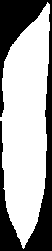

In [565]:
# Ensure your image is binary
binary = np.where(cropped_image > 0, 255, 0).astype(np.uint8)

# Define a kernel (3x3 or 5x5 depending on dot size)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Apply erosion
eroded = cv2.erode(binary, kernel, iterations=1)

cv2_imshow(eroded)

Rightmost pixels (x, y): [(np.int64(47), 2), (np.int64(48), 3), (np.int64(49), 4), (np.int64(49), 5), (np.int64(49), 6), (np.int64(49), 7), (np.int64(49), 8), (np.int64(49), 9), (np.int64(49), 10), (np.int64(49), 11), (np.int64(49), 12), (np.int64(49), 13), (np.int64(48), 14), (np.int64(48), 15), (np.int64(48), 16), (np.int64(48), 17), (np.int64(48), 18), (np.int64(48), 19), (np.int64(48), 20), (np.int64(48), 21), (np.int64(49), 22), (np.int64(49), 23), (np.int64(49), 24), (np.int64(49), 25), (np.int64(49), 26), (np.int64(49), 27), (np.int64(49), 28), (np.int64(49), 29), (np.int64(49), 30), (np.int64(48), 31), (np.int64(48), 32), (np.int64(48), 33), (np.int64(48), 34), (np.int64(48), 35), (np.int64(48), 36), (np.int64(48), 37), (np.int64(48), 38), (np.int64(48), 39), (np.int64(48), 40), (np.int64(48), 41), (np.int64(48), 42), (np.int64(48), 43), (np.int64(48), 44), (np.int64(48), 45), (np.int64(48), 46), (np.int64(48), 47), (np.int64(48), 48), (np.int64(48), 49), (np.int64(48), 50), (n

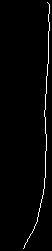

In [566]:
rightmost_pixels = []

# Iterate through each row of the boundary image
for row_index in range(eroded.shape[0]):
    row = eroded[row_index, :]

    # Find the indices where the pixel value is 255 (white)
    white_pixel_indices = np.where(row == 255)[0]

    # If there are white pixels in the row, find the rightmost one
    if len(white_pixel_indices) > 0:
        rightmost_x = np.max(white_pixel_indices)
        rightmost_pixels.append((rightmost_x, row_index))

print("Rightmost pixels (x, y):", rightmost_pixels)

# Optional: Visualize the rightmost pixels on a new blank image
rightmost_img = np.zeros_like(eroded)
for (x, y) in rightmost_pixels:
    rightmost_img[y, x] = 255

cv2_imshow(rightmost_img)

Image with only the boundary:


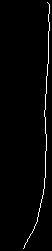

In [567]:
contours, hierarchy = cv2.findContours(rightmost_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

boundary_img = np.zeros_like(rightmost_img)
cv2.drawContours(boundary_img, contours, -1, (255, 255, 255), 1)

# Display the image with only the boundary
print("Image with only the boundary:")
cv2_imshow(boundary_img)

Original points: 247
Sampled points: 13
First 10 sampled:
 [(np.int64(47), 2), (np.int64(49), 22), (np.int64(48), 42), (np.int64(48), 62), (np.int64(46), 82), (np.int64(45), 102), (np.int64(45), 122), (np.int64(46), 142), (np.int64(45), 162), (np.int64(44), 182)]


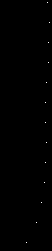

In [568]:
gap = 20  # take every 20th point

sampled_points = rightmost_pixels[::gap]

print("Original points:", len(rightmost_pixels))
print("Sampled points:", len(sampled_points))
print("First 10 sampled:\n", sampled_points[:10])


sampled_img = np.zeros_like(boundary_img)

# Draw only the sampled points
for (x, y) in sampled_points:
    sampled_img[y, x] = 255

cv2_imshow(sampled_img)

In [569]:
# import cv2
# import numpy as np

# # Get the largest contour (if multiple objects exist)
# contour = max(contours, key=cv2.contourArea)

# # Extract boundary points (serially ordered)
# boundary_points = contour.squeeze()  # shape (N, 2) -> [[x1,y1], [x2,y2], ...]

# print("Number of boundary points:", len(boundary_points))
# print("First 10 points:\n", boundary_points[:10])

# # Optional: visualize the points on an empty canvas
# boundary_img = np.zeros_like(boundary_img)
# for (x, y) in boundary_points:
#     boundary_img[y, x] = 255  # mark the point as white

# cv2_imshow(boundary_img)


In [570]:
# gap = 20  # take every 5th point

# sampled_points = boundary_points[::gap]

# print("Original points:", len(boundary_points))
# print("Sampled points:", len(sampled_points))
# print("First 10 sampled:\n", sampled_points[:10])


# boundary_img = np.zeros_like(boundary_img)

# # Draw only the sampled points
# for (x, y) in sampled_points:
#     boundary_img[y, x] = 255

# cv2_imshow(boundary_img)


In [571]:
# rightmost_pixels = []

# # Iterate through each row of the boundary image
# for row_index in range(boundary_img.shape[0]):
#     row = boundary_img[row_index, :]

#     # Find the indices where the pixel value is 255 (white)
#     white_pixel_indices = np.where(row == 255)[0]

#     # If there are white pixels in the row, find the rightmost one
#     if len(white_pixel_indices) > 0:
#         rightmost_x = np.max(white_pixel_indices)
#         rightmost_pixels.append((rightmost_x, row_index))

# print("Rightmost pixels (x, y):", rightmost_pixels)

# # Optional: Visualize the rightmost pixels on a new blank image
# rightmost_img = np.zeros_like(boundary_img)
# for (x, y) in rightmost_pixels:
#     rightmost_img[y, x] = 255

# cv2_imshow(rightmost_img)

In [572]:
angles = []

def angle_between_three_points(p1, p2, p3, orientation="CCW"):
    v1 = np.array(p1) - np.array(p2)
    v2 = np.array(p3) - np.array(p2)

    # normalize
    v1 = v1 / np.linalg.norm(v1)
    v2 = v2 / np.linalg.norm(v2)

    # interior angle (always ≤ 180)
    dot = np.dot(v1, v2)
    dot = np.clip(dot, -1.0, 1.0)
    interior = np.degrees(np.arccos(dot))

    # cross product z-component
    cross = v1[0]*v2[1] - v1[1]*v2[0]

    # decide convex vs concave
    if orientation == "CCW":
        if cross < 0:   # concave → reflex
            return 360 - interior
        else:           # convex → interior
            return interior
    else:  # CW orientation
        if cross > 0:   # concave → reflex
            return 360 - interior
        else:
            return interior


# ===== main loop =====
for i in range(len(sampled_points) - 2):
    p1, p2, p3 = sampled_points[i], sampled_points[i+1], sampled_points[i+2]
    angle = angle_between_three_points(p1, p2, p3, orientation="CCW")  # adjust orientation if needed

    if angle < 180:  # only reflex
        print(f"Reflex angle at index {i+1}: {angle:.2f}°")
        angles.append(angle)

print("All stored angles:", angles)


Reflex angle at index 2: 177.14°
Reflex angle at index 4: 177.15°
Reflex angle at index 5: 177.14°
Reflex angle at index 6: 177.14°
Reflex angle at index 8: 180.00°
All stored angles: [np.float64(177.13759477388808), np.float64(177.15181208861202), np.float64(177.13759477388808), np.float64(177.13759477388808), np.float64(179.99999852122068)]


In [573]:
# Subtract 180 from each angle and sum
result = sum(180 - angle for angle in angles)

print(len(angles))
print("Sum after subtracting 180 from each angle:", result)
print("Mul angle:", result * len(angles))

5
Sum after subtracting 180 from each angle: 11.435405068503059
Mul angle: 57.17702534251529
